In [1]:
import numpy as np
import matplotlib.pyplot as plt

def readMatrix(file):
    # Use the code below to read files
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

def nb_train(matrix, category):
    # Implement your algorithm and return 
    N = matrix.shape[1]
    
    ############################
    # Implement your code here #
    ############################
    l = matrix.shape[0]
    # Calculate two priors here:
    (unique, counts) = np.unique(category, return_counts = True)
    frequencies = np.asarray((unique, counts)).T
    prior_ns = frequencies[0,1] / l
    prior_s = frequencies[1,1] / l
    
    # Calculate likelihoods with Laplacian smoothing:
    smoothing_alpha = 1
    all_tokens_ns = 0
    all_tokens_s = 0
    state_ns = {}
    state_s = {}
    # Calculate the overall number of words for each category:
    for j in range(N):
        num_j_ns = num_j_s = 0
        for i in range(l):
            if category[i] == 0:
                if matrix[i,j] > 0:
                    num_j_ns += matrix[i,j]
                    all_tokens_ns += matrix[i,j]
            if category[i] == 1:
                if matrix[i,j] > 0:
                    num_j_s += matrix[i,j]
                    all_tokens_s += matrix[i,j]
        
        state_ns[j] = num_j_ns
        state_s[j] = num_j_s

    for j in range(N):
        state_ns[j] = (state_ns[j] + 1) / (all_tokens_ns + N)
        state_s[j] = (state_s[j] + 1) / (all_tokens_s + N)
    state = [prior_ns, prior_s, state_ns, state_s]

    return state


def nb_test(matrix, state):
    # Classify each email in the test set (each row of the document matrix) as 1 for SPAM and 0 for NON-SPAM
    output = np.zeros(matrix.shape[0])
    
    ############################
    # Implement your code here #
    ############################
    N = matrix.shape[1]
    l = matrix.shape[0]
    for i in range(l):
        posterior_ns = np.log(state[0])
        posterior_s = np.log(state[1])
        for j in range(N):
            if matrix[i,j] > 0:
                posterior_ns += np.log(np.power(state[2][j], matrix[i,j]))
                posterior_s += np.log(np.power(state[3][j], matrix[i,j]))
        if posterior_ns < posterior_s:
            output[i] = 1
        else:
            output[i] = 0
    print(output)
    
    return output

def evaluate(output, label):
    # Use the code below to obtain the accuracy of your algorithm
    error = (output != label).sum() * 1. / len(output)
    print('Error: {:2.4f}%'.format(100*error))
    return error

In [2]:
# Note1: tokenlists (list of all tokens) from MATRIX.TRAIN and MATRIX.TEST are identical
# Note2: Spam emails are denoted as class 1, and non-spam ones as class 0.
# Note3: The shape of the data matrix (document matrix): (number of emails) by (number of tokens)

# Load files
dataMatrix_train, tokenlist, category_train = readMatrix('q4_data/MATRIX.TRAIN')
dataMatrix_test, tokenlist, category_test = readMatrix('q4_data/MATRIX.TEST')

# Train
state = nb_train(dataMatrix_train, category_train)

# Test and evluate
prediction = nb_test(dataMatrix_test, state)
evaluate(prediction, category_test)

c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log


[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

0.01625

The following is the code for (b):

In [3]:
token_indicative_importance = {}
for j in range(dataMatrix_train.shape[1]):
    token_indicative_importance[j] = np.log(state[3][j] / state[2][j])

sorted_indicative = sorted(token_indicative_importance.items(), key = lambda kv: -kv[1])   
sorted_indicative_top_5 = [tokenlist[i[0]] for i in sorted_indicative[:5]]
print("The five tokens that are most indicative of the SPAM class is: ", sorted_indicative_top_5)

The five tokens that are most indicative of the SPAM class is:  ['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet']


The following is the code for (c):

The file MATRIX.TRAIN.50 gives the size of training set 50


c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in log
c:\users\administrator\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:80: RuntimeWarning: divide by zero encountered in log


[0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0.

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

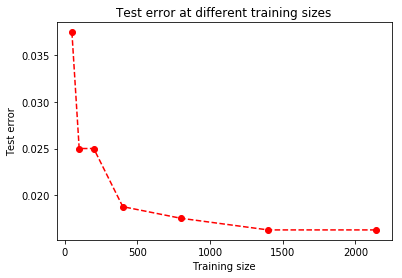

In [4]:
# Perform different Naive Bayes classifiers based on different input training sets:
file_path_ex = [".50",".100",".200",".400",".800",".1400",""]
lengths = []
error_list = []
dataMatrix_test, tokenlist, category_test = readMatrix('q4_data/MATRIX.TEST')

for f in file_path_ex:    
    dataMatrix_train, tokenlist, category_train = readMatrix('q4_data/MATRIX.TRAIN' + f)
    print("The file MATRIX.TRAIN{} gives the size of training set {}".format(f, dataMatrix_train.shape[0]))
    lengths.append(dataMatrix_train.shape[0])
    # Train
    state = nb_train(dataMatrix_train, category_train)
    # Test
    prediction = nb_test(dataMatrix_test, state)
    error = evaluate(prediction, category_test)
    error_list.append(error)

# Plot:
plt.figure()
plt.plot(lengths, error_list, '--o', c = "red")
plt.title("Test error at different training sizes")
plt.xlabel("Training size")
plt.ylabel("Test error")
plt.show()